SMS Spam Detection

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load file
data = pd.read_csv(r"Spam 1.csv", encoding='latin-1')

In [4]:
data.shape

(5572, 2)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Cleaning

In [6]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
 # Rename the columns name
data.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Count the total number of ham and spam messages
data['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
# Convert ham to 0 and spam to 1
data['target'] = data['target'].map({'ham': 0, 'spam': 1})
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Check null values
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# Check duplicate values
data.duplicated().sum()

np.int64(403)

In [12]:
# Remove Duplicate
data = data.drop_duplicates(keep = 'first')
data.shape

(5169, 2)

In [13]:
# Data Summary
data.describe(include='all')

,target,text
count,5169.000000,5169
unique,NaN,5169
top,NaN,Rofl. Its true to its name
freq,NaN,1
mean,0.126330,NaN
std,0.332253,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN


Data Distribution

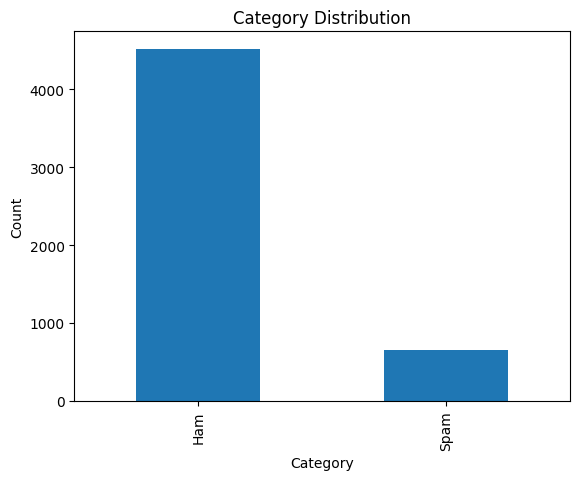

In [14]:
# Category Distribution
data['target'].value_counts().plot(kind='bar')
plt.xlabel('Category')  # Label for x-axis
plt.ylabel('Count')     # Label for y-axis
plt.title('Category Distribution')  # Title of the plot
plt.xticks([0, 1], ['Ham', 'Spam'])  # Replace 0 and 1 with Ham and Spam
plt.show()

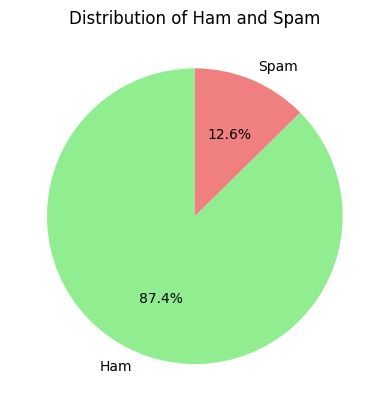

In [15]:
# Pie Chart Distribution for Ham and Spam messages
# Calculate the distribution
distribution = data['target'].value_counts()

# Labels for the pie chart
labels = ['Ham', 'Spam']

# Create the pie chart
plt.pie(
    distribution,
    labels=labels,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Start the pie chart from the top
    colors=['lightgreen', 'lightcoral']  # Optional: Colors for ham and spam
)

# Add the title
plt.title('Distribution of Ham and Spam')

# Display the pie chart
plt.show()

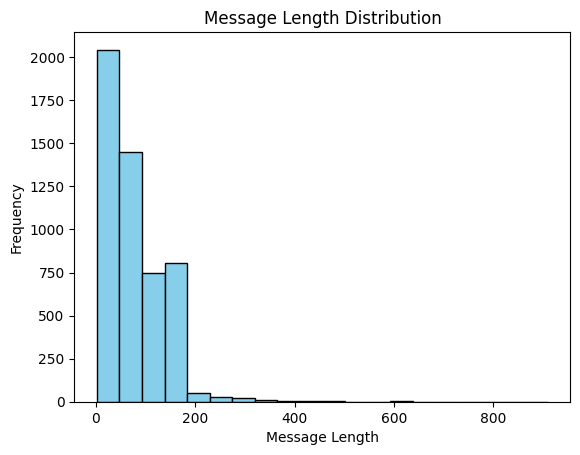

In [16]:
# Histogram for Message Length Distribution
data['text'].apply(len).plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Message Length')  # Label for x-axis
plt.ylabel('Frequency')       # Label for y-axis
plt.title('Message Length Distribution')  # Title of the plot
plt.show()

Text Preprocessing

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.3 MB/s eta 0:00:00


In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
corpus = []

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
for i in range(len(data)):
    msg = data['text'].iloc[i]

    # Handle contractions
    msg = contractions.fix(msg)

    # Replace email addresses
    msg = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddress', msg)

    # Replace URLs
    msg = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddress', msg)

    # Replace money symbols
    msg = re.sub(r'£|\$', 'moneysymbol', msg)

    # Replace phone numbers
    msg = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumber', msg)

    # Replace numbers
    msg = re.sub(r'\d+(\.\d+)?', 'number', msg)

    # Remove punctuation
    msg = re.sub(r'[^\w\d\s]', ' ', msg)

    # Convert to lowercase
    msg = msg.lower()

    # Tokenization
    msg = msg.split()

    # Remove stopwords
    msg = [word for word in msg if word not in stop_words]

    # Lemmatization
    msg = [lemmatizer.lemmatize(word) for word in msg]

    # Re-join tokens
    msg = ' '.join(msg)

    # Save processed corpus
    corpus.append(msg)

# Ensure the target column matches the length of the corpus
# Reset index of the original dataframe to ensure alignment
data = data.reset_index(drop=True)
processed_df = pd.DataFrame({'text': corpus, 'target': data['target'][:len(corpus)]})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

Classification

In [19]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    data['target'][:len(corpus)],  # Ensure labels align with the corpus
    test_size=0.2,  # 20% for testing
    random_state=0  # For reproducibility
)

Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix:
[[885   0]
 [ 21 128]]


In [ ]:
# Hyper-parameter (grid search)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [10, 20, None],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

# Apply GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Hyperparameters Found:")
print(grid_search.best_params_)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters Found:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Confusion Matrix:
[[885   0]
 [ 17 132]]


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Accuracy for Default Random Forest: 0.98
Accuracy for Best Random Forest (Grid Search): 0.98


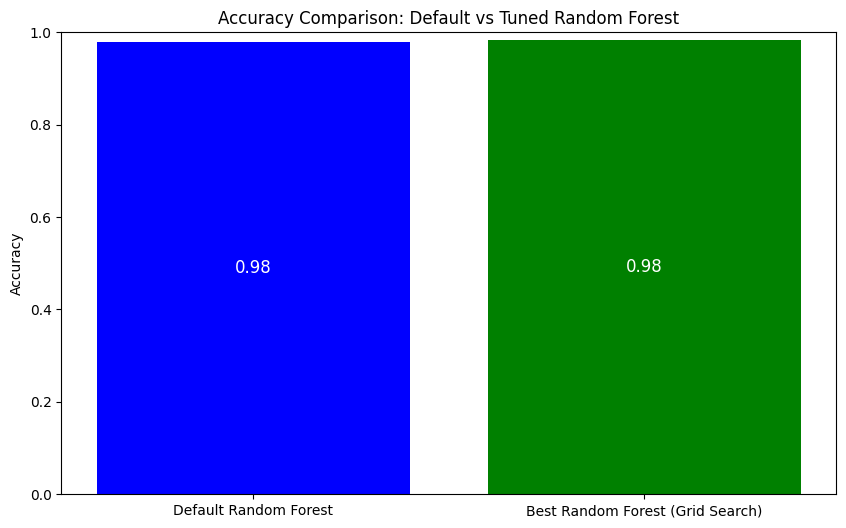

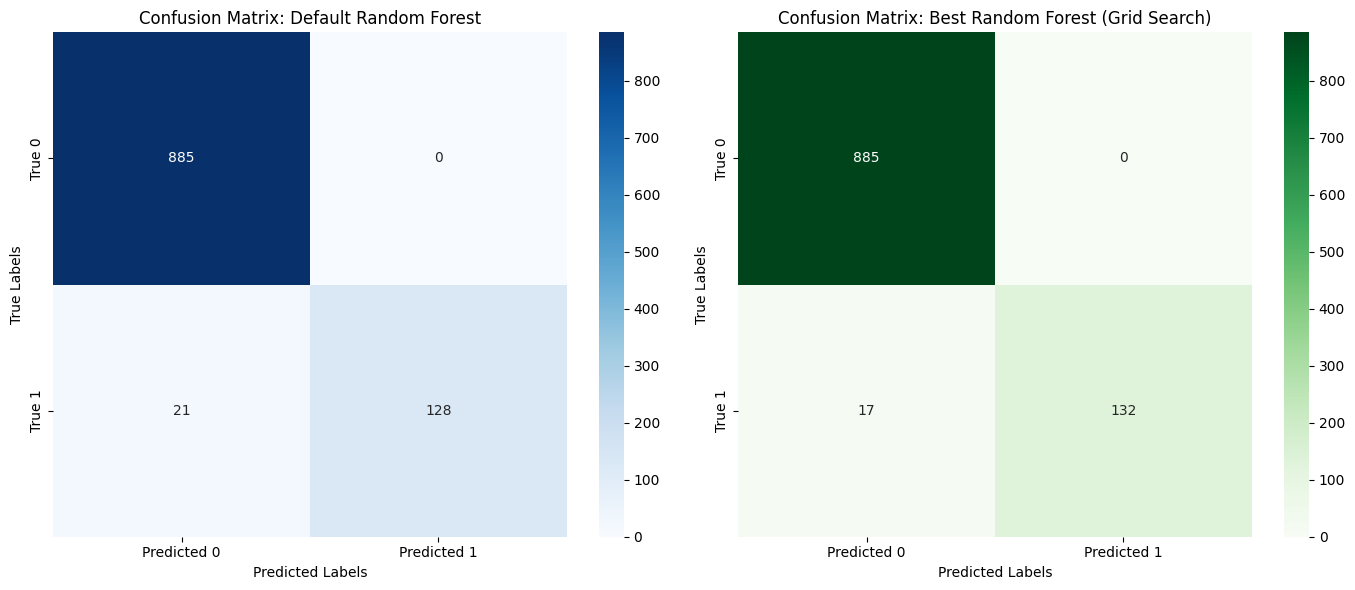

Classification Report for Default Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Classification Report for Best Random Forest (Grid Search):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# --- Random Forest Classifier (Default Model) ---
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred_default = classifier.predict(X_test)

# --- Grid Search for Hyperparameter Tuning ---
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

# --- Accuracy Comparison ---
accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_best = accuracy_score(y_test, y_pred_best)

# Print the accuracy values
print(f"Accuracy for Default Random Forest: {accuracy_default:.2f}")
print(f"Accuracy for Best Random Forest (Grid Search): {accuracy_best:.2f}")

# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(['Default Random Forest', 'Best Random Forest (Grid Search)'],
               [accuracy_default, accuracy_best], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Default vs Tuned Random Forest')
plt.ylim([0, 1])

# Adding accuracy values inside the bars
for bar, accuracy in zip(bars, [accuracy_default, accuracy_best]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{accuracy:.2f}',
             ha='center', va='center', fontsize=12, color='white')

plt.show()

# --- Confusion Matrices Comparison ---
# Default Random Forest Confusion Matrix
cm_default = confusion_matrix(y_test, y_pred_default)
# Best Random Forest Confusion Matrix (from Grid Search)
cm_best = confusion_matrix(y_test, y_pred_best)

# Plotting confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrix for default random forest
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix: Default Random Forest')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot confusion matrix for best random forest from grid search
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], ax=axes[1])
axes[1].set_title('Confusion Matrix: Best Random Forest (Grid Search)')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# --- Print Classification Report for both Models ---
print("Classification Report for Default Random Forest:")
print(classification_report(y_test, y_pred_default))

print("Classification Report for Best Random Forest (Grid Search):")
print(classification_report(y_test, y_pred_best))


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with k=3 (you can tune this value)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate
print("KNN Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classifier:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       885
           1       1.00      0.42      0.59       149

    accuracy                           0.92      1034
   macro avg       0.96      0.71      0.77      1034
weighted avg       0.92      0.92      0.90      1034



In [ ]:
#Hyper-parameter (grid search)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size for ball tree or kd tree algorithms
    'p': [1, 2],  # Power parameter for the Minkowski metric (1 is Manhattan, 2 is Euclidean)
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model to the data using Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model to predict on the test set
y_pred_knn = grid_search.best_estimator_.predict(X_test)

# Evaluate the KNN classifier's performance
print("KNN Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))



Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
KNN Classifier:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       885
           1       1.00      0.50      0.67       149

    accuracy                           0.93      1034
   macro avg       0.96      0.75      0.81      1034
weighted avg       0.93      0.93      0.92      1034



Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Accuracy for Default KNN: 0.92
Accuracy for Best KNN (Grid Search): 0.93


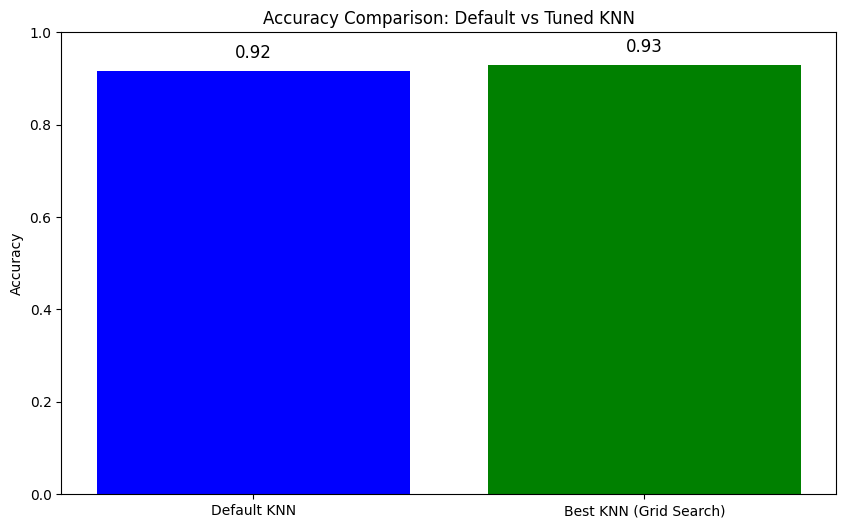

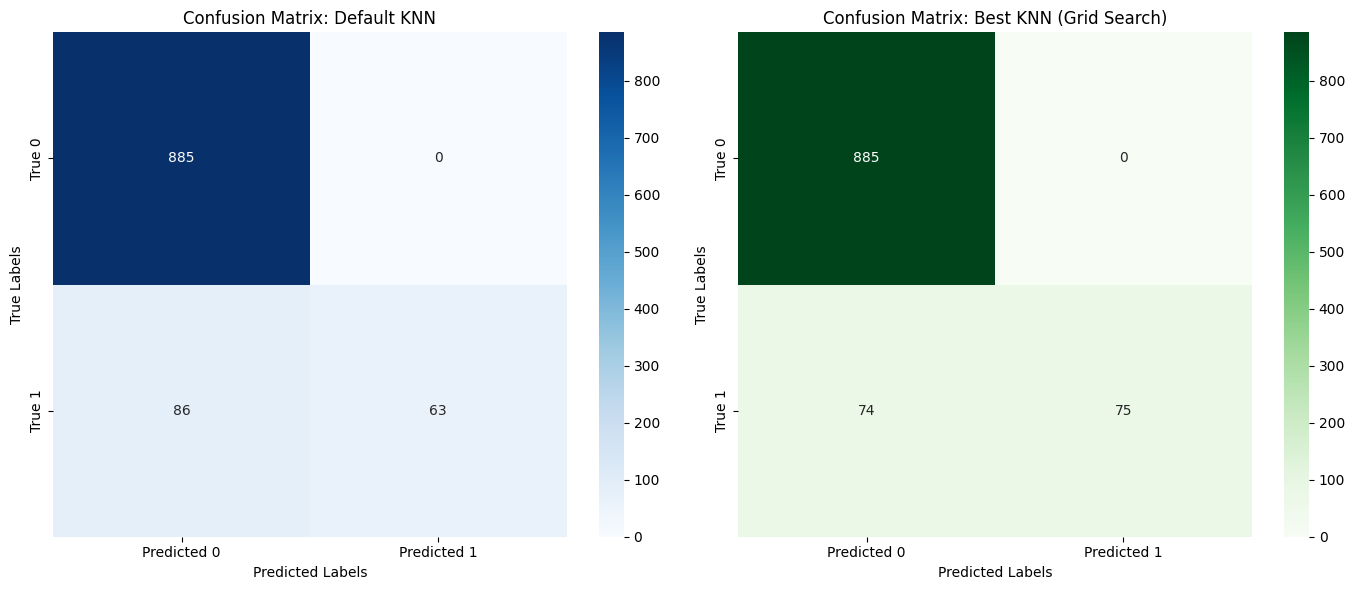

Classification Report for Default KNN:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       885
           1       1.00      0.42      0.59       149

    accuracy                           0.92      1034
   macro avg       0.96      0.71      0.77      1034
weighted avg       0.92      0.92      0.90      1034

Classification Report for Best KNN (Grid Search):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       885
           1       1.00      0.50      0.67       149

    accuracy                           0.93      1034
   macro avg       0.96      0.75      0.81      1034
weighted avg       0.93      0.93      0.92      1034



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# --- KNN Classifier (Default Model) ---
knn_classifier_default = KNeighborsClassifier(n_neighbors=3)  # Default value of k=3
knn_classifier_default.fit(X_train, y_train)
y_pred_knn_default = knn_classifier_default.predict(X_test)

# --- Grid Search for Hyperparameter Tuning ---
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute the nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size for ball tree or kd tree algorithms
    'p': [1, 2],  # Power parameter for the Minkowski metric (1 is Manhattan, 2 is Euclidean)
}

knn_classifier = KNeighborsClassifier()  # Initialize KNN classifier
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

y_pred_knn_best = best_knn.predict(X_test)

# --- Accuracy Comparison ---
accuracy_knn_default = accuracy_score(y_test, y_pred_knn_default)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Print accuracy values for both models
print(f"Accuracy for Default KNN: {accuracy_knn_default:.2f}")
print(f"Accuracy for Best KNN (Grid Search): {accuracy_knn_best:.2f}")

# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(['Default KNN', 'Best KNN (Grid Search)'], [accuracy_knn_default, accuracy_knn_best], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Default vs Tuned KNN')
plt.ylim([0, 1])

# Adding accuracy values on top of the bars
for bar, accuracy in zip(bars, [accuracy_knn_default, accuracy_knn_best]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.show()

# --- Confusion Matrices Comparison ---
# Default KNN Confusion Matrix
cm_knn_default = confusion_matrix(y_test, y_pred_knn_default)
# Best KNN Confusion Matrix (from Grid Search)
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)

# Plotting confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrix for default KNN
sns.heatmap(cm_knn_default, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix: Default KNN')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot confusion matrix for best KNN from grid search
sns.heatmap(cm_knn_best, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'], ax=axes[1])
axes[1].set_title('Confusion Matrix: Best KNN (Grid Search)')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# --- Print Classification Report for both Models ---
print("Classification Report for Default KNN:")
print(classification_report(y_test, y_pred_knn_default))

print("Classification Report for Best KNN (Grid Search):")
print(classification_report(y_test, y_pred_knn_best))


SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

#train the classifier
svm_classifier.fit(X_train, y_train)

#predict on the test set
y_pred_svm_default = svm_classifier.predict(X_test)

# Accuracy for Default SVM classifier
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_default):.2f}")

# F1-score, Recall and Precision for Default SVM classifier
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_default))

#AUC-ROC score for default svm classifier
print("AUC-ROC Score :")
print(roc_auc_score(y_test, y_pred_svm_default))

#confusion matrix for default svm
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm_default))

SVM Classifier:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.87      0.92       149

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

AUC-ROC Score :
0.9317559625374436
Confusion Matrix:
[[883   2]
 [ 20 129]]


In [ ]:
# Hyper-parameter (grid search)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')  

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'shrinking': [True, False],
    'probability': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Train the model using GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters from Grid Search:")
print(grid_search.best_params_)

# Use the best model found by GridSearchCV
best_svm_classifier = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_svm = best_svm_classifier.predict(X_test)

# Evaluation metrics
print("SVM Classifier (with GridSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}") #accuracy
print(f"\nClassification Report:\n {classification_report(y_test, y_pred_svm)}") # classification report
print(f"\nAUC-ROC Score (with GridSearchCV) \n: {roc_auc_score(y_test, y_pred_svm)}") #auc-roc

#confusion matrix for GridSearchCV svm
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Best Hyperparameters from Grid Search:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True, 'shrinking': True}
SVM Classifier (with GridSearchCV):
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

AUC-ROC Score (with GridSearchCV):
0.9390323436848292


In [ ]:
# for Random Search CV
from sklearn.model_selection import RandomizedSearchCV

param_dist_svm_random = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'shrinking': [True, False],
    'probability': [True, False]
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search_svm = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist_svm_random, cv=5, n_jobs=-1)
random_search_svm.fit(X_train, y_train)

# Output the best parameters from Randomized Search
print(f"\nBest Parameters from Randomized Search:\n {random_search_svm.best_params_}")

# Best Model Evaluation (from Randomized Search)
best_model_random = random_search_svm.best_estimator_
y_pred_random_svm = best_model_random.predict(X_test)

# Evaluate
print("SVM Classifier (with RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_random_svm):.2f}") #accuracy
print(f"\nClassification Report:\n {classification_report(y_test, y_pred_random_svm)}") # classification report
print(f"\nAUC-ROC Score (with RandomizedSearchCV) \n: {roc_auc_score(y_test, y_pred_random_svm)}") #auc-roc

#confusion matrix for RandomizedSearchCV svm
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_random_svm))


Best Parameters from Randomized Search:
{'shrinking': True, 'probability': False, 'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
SVM Classifier (with RandomizedSearchCV):
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.88      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

AUC-ROC Score (with RandomizedSearchCV):
0.9384673719334168


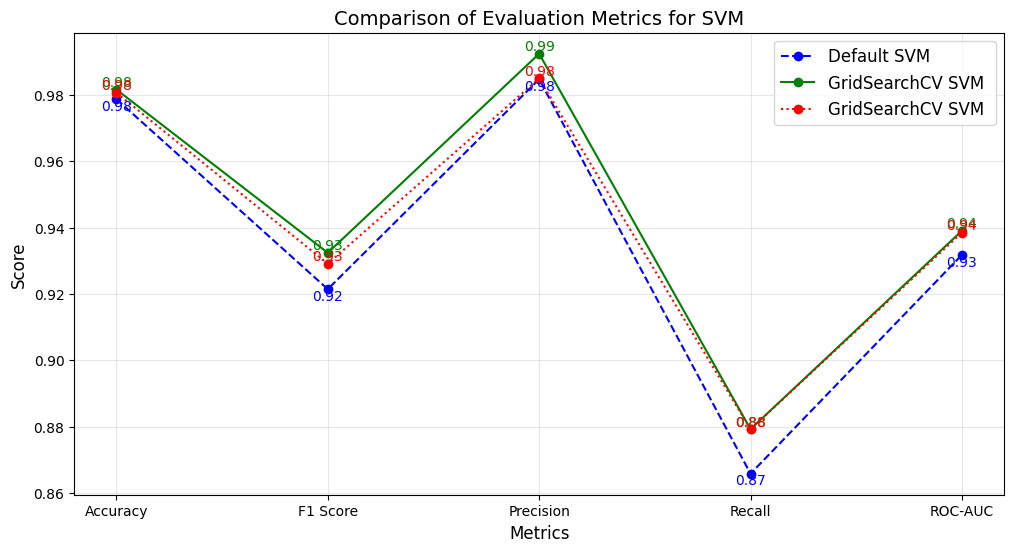

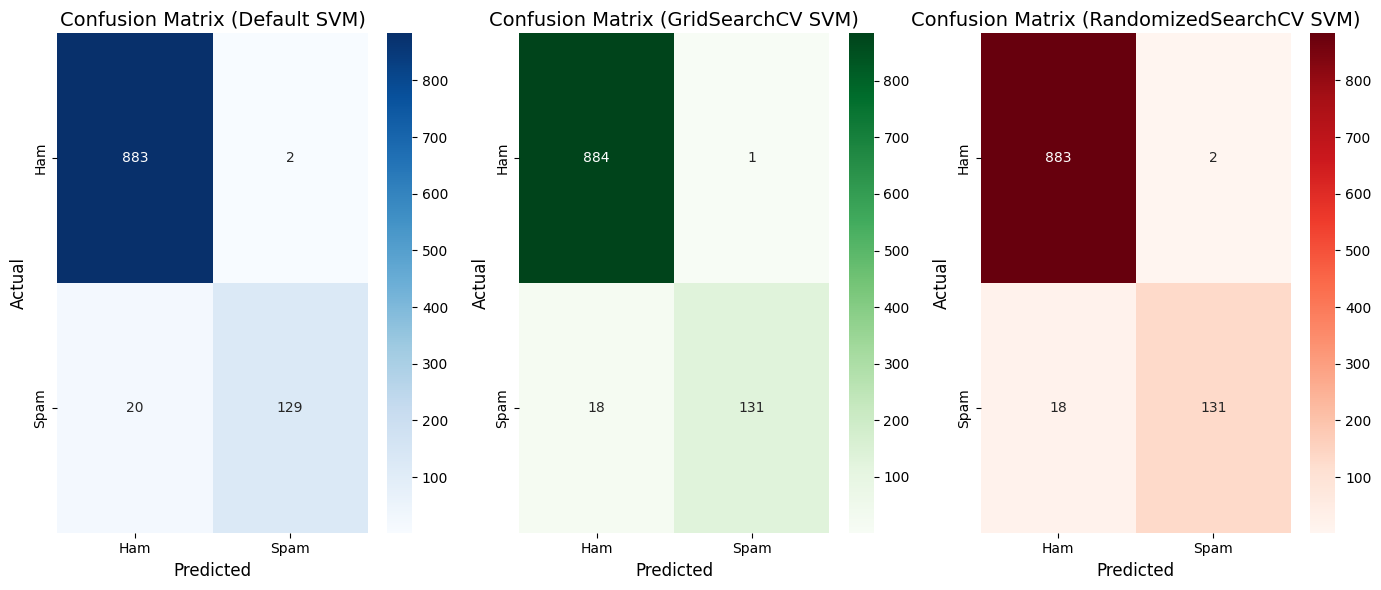

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Compute metrics for Default SVM
accuracy_default = accuracy_score(y_test, y_pred_svm_default)
f1_default = f1_score(y_test, y_pred_svm_default)
precision_default = precision_score(y_test, y_pred_svm_default)
recall_default = recall_score(y_test, y_pred_svm_default)
roc_auc_default = roc_auc_score(y_test, y_pred_svm_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_svm_default)

# Compute metrics for GridSearchCV SVM
accuracy_svm_GridSearchCV = accuracy_score(y_test,y_pred_svm)
f1_svm_GridSearchCV = f1_score(y_test, y_pred_svm)
precision_svm_GridSearchCV = precision_score(y_test, y_pred_svm)
recall_svm_GridSearchCV = recall_score(y_test, y_pred_svm)
roc_auc_svm_GridSearchCV = roc_auc_score(y_test, y_pred_svm)
conf_matrix_svm_GridSearchCV = confusion_matrix(y_test, y_pred_svm)

# Compute metrics for RandomizedSearchCV SVM
accuracy_svm_RandomizedSearchCV = accuracy_score(y_test,y_pred_random_svm)
f1_svm_RandomizedSearchCV = f1_score(y_test, y_pred_random_svm)
precision_svm_RandomizedSearchCV = precision_score(y_test, y_pred_random_svm)
recall_svm_RandomizedSearchCV = recall_score(y_test, y_pred_random_svm)
roc_auc_svm_RandomizedSearchCV = roc_auc_score(y_test, y_pred_random_svm)
conf_matrix_svm_RandomizedSearchCV = confusion_matrix(y_test, y_pred_random_svm)

# Metrics for line plot
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']
default_values = [accuracy_default, f1_default, precision_default, recall_default, roc_auc_default]
GridSearchCV_values = [accuracy_svm_GridSearchCV, f1_svm_GridSearchCV, precision_svm_GridSearchCV, recall_svm_GridSearchCV, roc_auc_svm_GridSearchCV]
RandomizedSearchCV_values = [accuracy_svm_RandomizedSearchCV, f1_svm_RandomizedSearchCV, precision_svm_RandomizedSearchCV, recall_svm_RandomizedSearchCV, roc_auc_svm_RandomizedSearchCV]


# Line Plot for Metrics Comparison
# marker = label for data point 'o' = circle marker
# linestyle '--' = dashed line style, ":" dotted line, "-" solid line
plt.figure(figsize=(12, 6))
plt.plot(metrics, default_values, label='Default SVM', marker='o', linestyle='--', color='blue')
plt.plot(metrics, GridSearchCV_values, label='GridSearchCV SVM ', marker='o', linestyle='-', color='green')
plt.plot(metrics, RandomizedSearchCV_values, label='GridSearchCV SVM ', marker='o', linestyle=':', color='red')


# Annotate metric values on the plot
for i, value in enumerate(default_values):
    plt.text(metrics[i], value, f"{value:.2f}", color='blue', ha='center', va='top',fontsize=10)
for i, value in enumerate(GridSearchCV_values):
    plt.text(metrics[i], value, f"{value:.2f}", color='green', ha='center', va='bottom',fontsize=10)
for i, value in enumerate(RandomizedSearchCV_values):
    plt.text(metrics[i], value, f"{value:.2f}", color='red', ha='center', va='bottom',fontsize=10)


plt.title('Comparison of Evaluation Metrics for SVM', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Confusion Matrices Heatmaps for SVM
fig, axes = plt.subplots(1, 3, figsize=(14, 6))
# annot = annotation,, shows the label of each value
# fmt = format, d = integer
# c = color map
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', ax=axes[0],xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[0].set_title('Confusion Matrix (Default SVM)', fontsize=14)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)

sns.heatmap(conf_matrix_svm_GridSearchCV, annot=True, fmt='d', cmap='Greens', ax=axes[1],xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[1].set_title('Confusion Matrix (GridSearchCV SVM)', fontsize=14)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)

sns.heatmap(conf_matrix_svm_RandomizedSearchCV, annot=True, fmt='d', cmap='Reds', ax=axes[2],xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[2].set_title('Confusion Matrix (RandomizedSearchCV SVM)', fontsize=14)
axes[2].set_xlabel('Predicted', fontsize=12)
axes[2].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()


Logistic

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(random_state=0)

# Train the classifier
log_reg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_classifier.predict(X_test)

# Evaluate
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Classifier:
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       885
           1       0.99      0.77      0.87       149

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034



In [21]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(random_state=0)

# Define a more comprehensive hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],          # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength (smaller values = stronger regularization)
    'solver': ['liblinear', 'saga'],  # Algorithm to use (these solvers support both l1 and l2)
    'max_iter': [100, 500, 1000],     # Maximum iterations for convergence
    'class_weight': ['balanced', None] # Handle class imbalance
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=log_reg_classifier,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring='f1',        # Optimize for F1 score due to class imbalance
    n_jobs=-1,          # Use all available cores
    verbose=1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Make predictions with best model
y_pred = best_model.predict(X_test)

# Evaluate
print("\nBest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Best Model Performance:
Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.89      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Accuracy for Default Logistic Regression: 0.97
Accuracy for Best Logistic Regression (Grid Search): 0.98


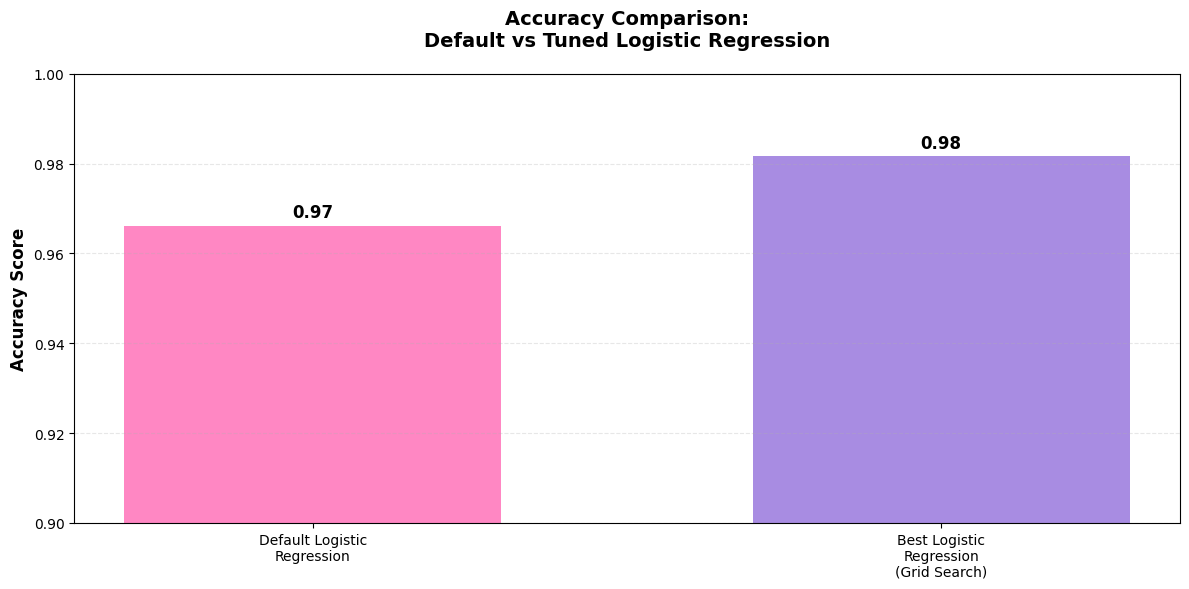

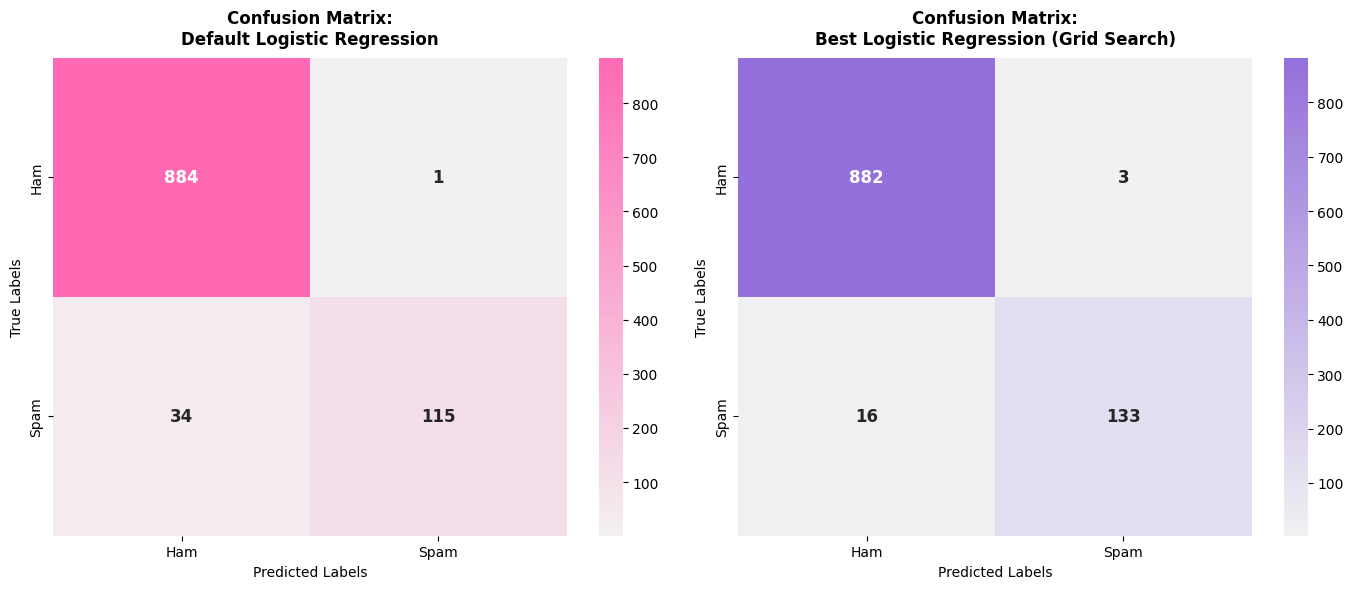

Classification Report for Default Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       885
           1       0.99      0.77      0.87       149

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034

Classification Report for Best Logistic Regression (Grid Search):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.98      0.89      0.93       149

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Logistic Regression (Default Model) ---
log_reg_classifier_default = LogisticRegression(random_state=0)
log_reg_classifier_default.fit(X_train, y_train)
y_pred_log_reg_default = log_reg_classifier_default.predict(X_test)

# --- Grid Search for Hyperparameter Tuning ---
param_grid_log_reg = {
    'penalty': ['l1', 'l2'],          # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use
    'max_iter': [100, 500, 1000],     # Maximum iterations for convergence
    'class_weight': ['balanced', None, {0:1, 1:5}, {0:1, 1:10}]  # Class weight options
}

# Initialize GridSearchCV 
grid_search_log_reg = GridSearchCV(
    estimator=LogisticRegression(random_state=0),
    param_grid=param_grid_log_reg,
    cv=5,                # 5-fold cross-validation
    scoring='f1_macro',  # Better metric for imbalanced classes
    n_jobs=-1,          # Use all available cores
    verbose=1
)

# Fit the GridSearchCV object
grid_search_log_reg.fit(X_train, y_train)

# Best model from grid search
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg_best = best_log_reg.predict(X_test)

# --- Accuracy Comparison ---
accuracy_log_reg_default = accuracy_score(y_test, y_pred_log_reg_default)
accuracy_log_reg_best = accuracy_score(y_test, y_pred_log_reg_best)

# Print accuracy values for both models
print(f"Accuracy for Default Logistic Regression: {accuracy_log_reg_default:.2f}")
print(f"Accuracy for Best Logistic Regression (Grid Search): {accuracy_log_reg_best:.2f}")

# Create a more stylish bar plot with pink and purple colors
plt.figure(figsize=(12, 6), facecolor='white')

# Create bar plot with gradient colors
colors = ['#FF69B4', '#9370DB']  # Pink and Purple
x = ['Default Logistic\nRegression', 'Best Logistic\nRegression\n(Grid Search)']
accuracies = [accuracy_log_reg_default, accuracy_log_reg_best]

# Create bars with a more modern style
bars = plt.bar(x, accuracies, color=colors, width=0.6, alpha=0.8)
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Accuracy Comparison:\nDefault vs Tuned Logistic Regression', 
          fontsize=14, pad=20, fontweight='bold')
plt.ylim([0.90, 1.0])  # Adjusted y-axis to better show differences

# Add value labels on top of bars with 2 decimal places
for bar, accuracy in zip(bars, [accuracy_log_reg_default, accuracy_log_reg_best]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{accuracy:.2f}',  # Changed to 2 decimal places
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the plot
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# --- Confusion Matrices Comparison ---
# Compute confusion matrices
cm_log_reg_default = confusion_matrix(y_test, y_pred_log_reg_default)
cm_log_reg_best = confusion_matrix(y_test, y_pred_log_reg_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor='white')

# Plot confusion matrix for default Logistic Regression with pink colormap
sns.heatmap(cm_log_reg_default, annot=True, fmt="d", 
            cmap=sns.light_palette("#FF69B4", as_cmap=True),  # Pure pink colormap
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'], 
            ax=axes[0],
            annot_kws={'size': 12, 'weight': 'bold'})
axes[0].set_title('Confusion Matrix:\nDefault Logistic Regression', 
                  pad=10, fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted Labels', fontsize=10)
axes[0].set_ylabel('True Labels', fontsize=10)

# Plot confusion matrix for best Logistic Regression with purple colormap
sns.heatmap(cm_log_reg_best, annot=True, fmt="d", 
            cmap=sns.light_palette("#9370DB", as_cmap=True),  # Pure purple colormap
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'], 
            ax=axes[1],
            annot_kws={'size': 12, 'weight': 'bold'})
axes[1].set_title('Confusion Matrix:\nBest Logistic Regression (Grid Search)', 
                  pad=10, fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted Labels', fontsize=10)
axes[1].set_ylabel('True Labels', fontsize=10)

plt.tight_layout()
plt.show()

# --- Print Classification Report for both Models ---
print("Classification Report for Default Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg_default))

print("Classification Report for Best Logistic Regression (Grid Search):")
print(classification_report(y_test, y_pred_log_reg_best))